# Loading the dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
(x_train, y_train) ,(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# Exploring the dataset

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Data Visualization

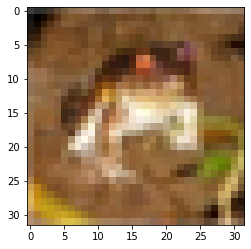

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Maximum and minimum value of y
print("Min value of y is : ",int(min(y_train)))
print("Max value of y is : ",int(max(y_train)))


Min value of y is :  0
Max value of y is :  9


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

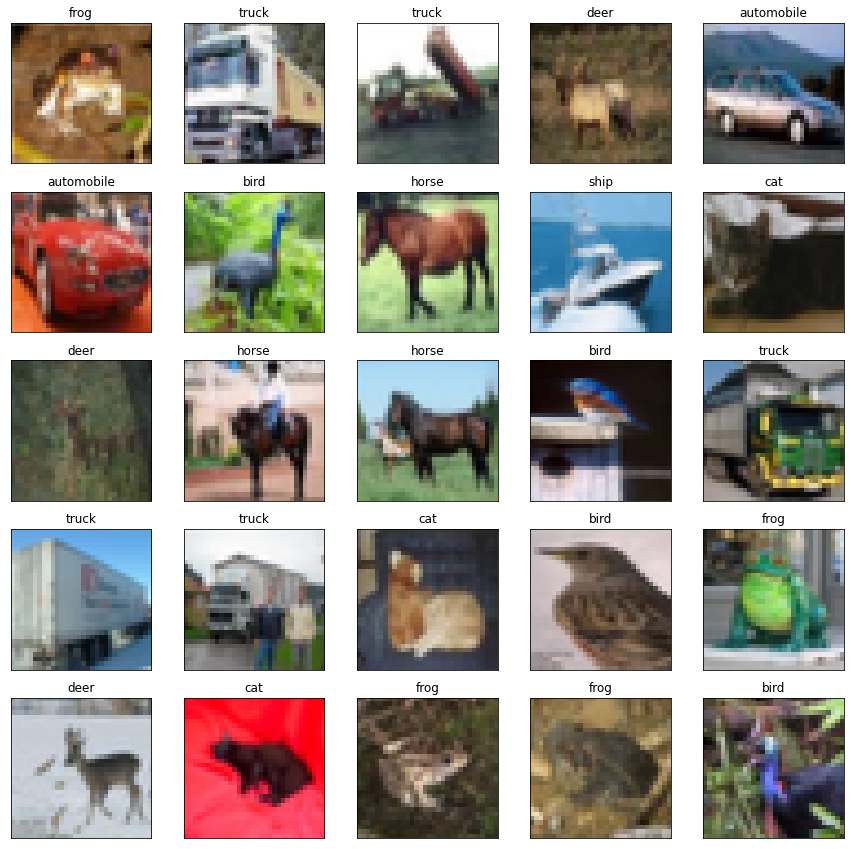

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(15, 15))
index = 0
for i in range(5):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# Preprocessing data

### Normalization

In [ ]:
x_train = x_train/255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### One Hot Encoding

In [ ]:
#One Hot Encoding
y_train_encoded = keras.utils.to_categorical(y_train , num_classes = 10 , dtype = 'float32')
y_train_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_encoded = keras.utils.to_categorical(y_test , num_classes = 10 , dtype = 'float32')
y_test_encoded[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_encoded[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Multilayer Perceptron

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000 , activation = 'relu'),
        keras.layers.Dense(3000 , activation = 'relu'),
        keras.layers.Dense(10 , activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'SGD',loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train , y_train_encoded,epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 175s 111ms/step - loss: 1.8067 - accuracy: 0.3583
Epoch 2/50
1563/1563 [==============================] - 173s 111ms/step - loss: 1.6209 - accuracy: 0.4293
Epoch 3/50
1563/1563 [==============================] - 173s 110ms/step - loss: 1.5377 - accuracy: 0.4598
Epoch 4/50
1563/1563 [==============================] - 172s 110ms/step - loss: 1.4784 - accuracy: 0.4801
Epoch 5/50
1563/1563 [==============================] - 173s 110ms/step - loss: 1.4266 - accuracy: 0.4979
Epoch 6/50
1563/1563 [==============================] - 172s 110ms/step - loss: 1.3842 - accuracy: 0.5147
Epoch 7/50
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3459 - accuracy: 0.5260
Epoch 8/50
1563/1563 [==============================] - 173s 110ms/step - loss: 1.3111 - accuracy: 0.5405
Epoch 9/50
1563/1563 [==============================] - 172s 110ms/step - loss: 1.2753 - accuracy: 0.5529
Epoch 10/50
1563/1563 [=======================

In [ ]:
labels[np.argmax(model.predict(x_test)[0])]

'cat'

In [ ]:
labels[y_test[0][0]]

'cat'

In [ ]:
model.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 11s 35ms/step - loss: 1.7792 - accuracy: 0.5263


[1.7792036533355713, 0.5263000130653381]

In [ ]:
y_predict = model.predict(x_test)
predicted_class = [np.argmax(element) for element in y_predict]
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_MLP= accuracy_score(predicted_class,y_test)
accuracy_MLP

0.5272

In [ ]:
print("Classification Report: \n", classification_report(y_test,predicted_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.45      0.56      1000
           1       0.75      0.55      0.64      1000
           2       0.54      0.34      0.42      1000
           3       0.36      0.43      0.39      1000
           4       0.55      0.42      0.48      1000
           5       0.45      0.49      0.47      1000
           6       0.77      0.42      0.54      1000
           7       0.59      0.65      0.62      1000
           8       0.69      0.69      0.69      1000
           9       0.36      0.82      0.50      1000

    accuracy                           0.53     10000
   macro avg       0.58      0.53      0.53     10000
weighted avg       0.58      0.53      0.53     10000



# CNN

In [ ]:
model2 = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(64 , activation = 'relu'),
        keras.layers.Dense(10 , activation = 'softmax')
])

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

In [ ]:
model2.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5015 - accuracy: 0.4632
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1790 - accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0489 - accuracy: 0.6322
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9707 - accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9122 - accuracy: 0.6830
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8687 - accuracy: 0.6969
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8272 - accuracy: 0.7125
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7899 - accuracy: 0.7254
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7559 - accuracy: 0.7368
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [ ]:
y_predict = model2.predict(x_test)
predicted_class = [np.argmax(element) for element in y_predict]
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
accuracy_CNN = accuracy_score(predicted_class,y_test)
accuracy_CNN

0.6804

In [ ]:
print("Classification Report: \n", classification_report(y_test,predicted_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.77      0.84      0.80      1000
           2       0.54      0.61      0.58      1000
           3       0.53      0.44      0.48      1000
           4       0.72      0.48      0.58      1000
           5       0.57      0.56      0.56      1000
           6       0.71      0.79      0.75      1000
           7       0.71      0.75      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



# Grey Scale Images

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

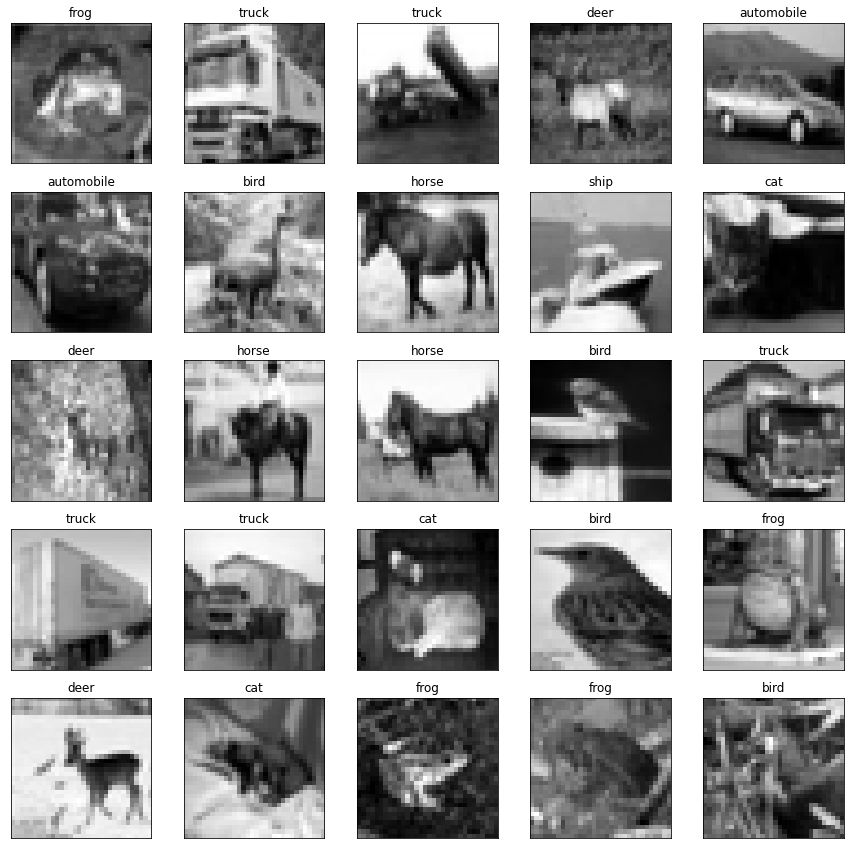

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(15, 15))
index = 0
for i in range(5):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(x_train[index] , cmap = 'gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test / 255

In [ ]:
y_train_encoded = keras.utils.to_categorical(y_train , num_classes = 10 , dtype = 'float32')
y_train_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_encoded = keras.utils.to_categorical(y_test , num_classes = 10 , dtype = 'float32')
y_test_encoded[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
model3 = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(64 , activation = 'relu'),
        keras.layers.Dense(10 , activation = 'softmax')
])

In [ ]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'] )

In [ ]:
model3.fit(x_train,y_train_encoded,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6606 - accuracy: 0.4114
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.3278 - accuracy: 0.5377
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1988 - accuracy: 0.5859
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1204 - accuracy: 0.6119
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0611 - accuracy: 0.6316
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0087 - accuracy: 0.6511
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9627 - accuracy: 0.6681
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9230 - accuracy: 0.6817
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8845 - accuracy: 0.6932
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [ ]:
y_predict3 = model3.predict(x_test)
predicted_class3 = [np.argmax(element) for element in y_predict3]
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
accuracy_CNN_grey = accuracy_score(predicted_class3,y_test)
accuracy_CNN_grey

0.6495

In [ ]:
model4 = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3) , activation = 'relu' , input_shape = (x_train.shape[1], x_train.shape[2], 1)),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(256 , activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128 , activation = 'relu'),
        keras.layers.Dense(64 , activation = 'relu'),
        keras.layers.Dense(64 , activation = 'relu'),
        keras.layers.Dense(10 , activation = 'softmax')
])

In [ ]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'] )

In [ ]:
model4.fit(x_train,y_train_encoded,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 223s 142ms/step - loss: 1.7563 - accuracy: 0.3435
Epoch 2/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.2830 - accuracy: 0.5473
Epoch 3/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.1008 - accuracy: 0.6147
Epoch 4/10
1563/1563 [==============================] - 226s 144ms/step - loss: 0.9936 - accuracy: 0.6546
Epoch 5/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.9107 - accuracy: 0.6822
Epoch 6/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.8521 - accuracy: 0.7046
Epoch 7/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.7972 - accuracy: 0.7227
Epoch 8/10
1563/1563 [==============================] - 226s 144ms/step - loss: 0.7570 - accuracy: 0.7353
Epoch 9/10
1563/1563 [==============================] - 224s 144ms/step - loss: 0.7169 - accuracy: 0.7512
Epoch 10/10
1563/1563 [=======================

In [ ]:
y_predict4 = model4.predict(x_test)
predicted_class4 = [np.argmax(element) for element in y_predict4]
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
accuracy_CNN_grey_more_layers = accuracy_score(predicted_class4,y_test)
accuracy_CNN_grey_more_layers

0.7103

In [ ]:
print("Classification Report: \n", classification_report(y_test,predicted_class4))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      1000
           1       0.89      0.85      0.87      1000
           2       0.55      0.64      0.59      1000
           3       0.45      0.56      0.50      1000
           4       0.68      0.60      0.64      1000
           5       0.64      0.58      0.61      1000
           6       0.71      0.80      0.75      1000
           7       0.82      0.72      0.77      1000
           8       0.87      0.81      0.84      1000
           9       0.85      0.79      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



# LDA